# 🏥 HealthCare Data Analysis
This project analyzes a synthetic healthcare dataset containing patient information such as gender, age, diagnosis, treatment costs, admission/discharge dates, and readmission outcomes. The goal is to identify actionable insights for healthcare service improvement.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset 
health_data=pd.read_excel('Python Practice Datasets/Healthcare_Data.xlsx')

In [3]:
health_data.head(5)

,Patient_ID,Name,Gender,Age,City,Admission_Date,Discharge_Date,Department,Doctor_Name,Diagnosis,Treatment_Cost,Payment_Method,Readmission_Within_30_Days,Length_of_Stay,Outcome
0,1,Mr. Ryan Hurst,Male,86,Ashleyview,2025-01-22,2025-02-12,Oncology,Christopher Miller,Tuberculosis,14960.23,Insurance,Yes,21.0,Deceased
1,2,Pamela Payne,Femal,25,Port Jeremy,2025-01-16,2025-01-30,Oncology,David Guzman,Tuberculosis,2327.06,Medicare,Yes,14.0,Recovered
2,3,Dana Miller,Mle,43,South Melissa,2024-07-14,2024-07-29,Orthopedics,Derek Shaw,Fracture,NaN,Cash,No,15.0,Ongoing
3,4,Kristin Herrera,Male,93,Wallacemouth,2025-04-18,2025-04-22,General Medicine,Bethany Harrison,Tuberculosis,2385.97,Insurance,Yes,4.0,Ongoing
4,5,William Gray,Femal,24,Lake Jamestown,2024-08-02,2024-08-05,Oncology,Francisco Wagner,Hypertension,16673.39,Insurance,No,3.0,Deceased


# Data Cleaning and Operations

#### What is the shape of the dataset ?

In [4]:
health_data.shape

(555, 15)

#### What is the number of duplicated records ? 

In [5]:
# The number of duplicate records 
health_data.duplicated().sum()

np.int64(5)

#### Deleting Duplicated Records 

In [6]:
# Deleting the duplicate rows 
health_data.drop_duplicates(inplace=True)

#### New DataFrame 

In [7]:
# New, unique data 
health_data

,Patient_ID,Name,Gender,Age,City,Admission_Date,Discharge_Date,Department,Doctor_Name,Diagnosis,Treatment_Cost,Payment_Method,Readmission_Within_30_Days,Length_of_Stay,Outcome
0,1,Mr. Ryan Hurst,Male,86,Ashleyview,2025-01-22,2025-02-12,Oncology,Christopher Miller,Tuberculosis,14960.23,Insurance,Yes,21.0,Deceased
1,2,Pamela Payne,Femal,25,Port Jeremy,2025-01-16,2025-01-30,Oncology,David Guzman,Tuberculosis,2327.06,Medicare,Yes,14.0,Recovered
2,3,Dana Miller,Mle,43,South Melissa,2024-07-14,2024-07-29,Orthopedics,Derek Shaw,Fracture,NaN,Cash,No,15.0,Ongoing
3,4,Kristin Herrera,Male,93,Wallacemouth,2025-04-18,2025-04-22,General Medicine,Bethany Harrison,Tuberculosis,2385.97,Insurance,Yes,4.0,Ongoing
4,5,William Gray,Femal,24,Lake Jamestown,2024-08-02,2024-08-05,Oncology,Francisco Wagner,Hypertension,16673.39,Insurance,No,3.0,Deceased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,546,Daniel Hansen,Femal,77,West Jerryview,2024-09-20,2024-09-25,Orthopedics,Holly Roth,Migraine,7305.89,Insurance,Yes,5.0,Recovered
546,547,Derrick Graham,Femal,73,West Laurie,2024-07-24,2024-07-28,Gastroenterology,John Allen,Tuberculosis,3975.84,Cash,No,4.0,Ongoing
547,548,Derek Walters,Other,48,Delacruzborough,2024-05-20,2024-06-13,Gastroenterology,Dennis Baker,Hypertension,18663.86,Medicare,No,24.0,Deceased
548,549,Meghan Kelly,Femal,52,Gonzalezhaven,2024-11-30,2024-12-03,Pediatrics,Rebecca Hall,Asthma,3123.64,Cash,No,3.0,Deceased


#### Missing Data in Dataset

In [8]:
health_data.isnull().sum()

Patient_ID                     0
Name                           0
Gender                         0
Age                            0
City                           0
Admission_Date                 0
Discharge_Date                 6
Department                     0
Doctor_Name                    0
Diagnosis                      0
Treatment_Cost                16
Payment_Method                 0
Readmission_Within_30_Days     0
Length_of_Stay                 6
Outcome                        0
dtype: int64

#### Missing Value Treatment for Treatment_Cost

In [9]:
health_data['Treatment_Cost']

0      14960.23
1       2327.06
2           NaN
3       2385.97
4      16673.39
         ...   
545     7305.89
546     3975.84
547    18663.86
548     3123.64
549    14729.71
Name: Treatment_Cost, Length: 550, dtype: float64

In [10]:
# Replacing the missing values in the treatment column with mean val 
health_data['Treatment_Cost']=health_data['Treatment_Cost'].fillna(health_data['Treatment_Cost'].mean())

In [11]:
health_data['Treatment_Cost'].isnull().sum()
# We can see there is no null data in the Treatment_Cost Column 

np.int64(0)

#### Missing Value Treatment for Discharge Date 

In [12]:
health_data[health_data['Discharge_Date'].isnull()]

,Patient_ID,Name,Gender,Age,City,Admission_Date,Discharge_Date,Department,Doctor_Name,Diagnosis,Treatment_Cost,Payment_Method,Readmission_Within_30_Days,Length_of_Stay,Outcome
155,156,Janet Williams,Other,30,Lindseymouth,2024-05-20,NaT,Pediatrics,Lisa Clark,Arthritis,14511.61,Cash,No,NaN,Deceased
199,200,Nicole Jones,Femal,20,Coreyland,2024-06-14,NaT,General Medicine,Brittany Watkins,COVID-19,2460.63,Medicare,No,NaN,Deceased
300,301,Beth Thomas,Female,37,Dennisfurt,2025-03-01,NaT,Pediatrics,Antonio Murphy,Cancer,6882.37,Cash,No,NaN,Ongoing
439,440,David Smith,Mle,66,Davidborough,2024-10-17,NaT,General Medicine,Julian Medina,Migraine,18088.70,Insurance,No,NaN,Deceased
442,443,David Jordan,Female,88,Robinborough,2024-08-08,NaT,Gastroenterology,Dean Medina,Migraine,11770.75,Medicare,No,NaN,Ongoing
458,459,Vanessa Carrillo,Femal,5,West Travisville,2024-06-05,NaT,Gastroenterology,Stephanie Figueroa,COVID-19,19137.70,Credit Card,Yes,NaN,Deceased


#### Strategy: Dropping the rows 

In [14]:
# Dropping this rows
health_data = health_data[health_data['Discharge_Date'].notnull()]

In [16]:
health_data['Discharge_Date'].isnull().sum()

np.int64(0)

In [17]:
health_data

,Patient_ID,Name,Gender,Age,City,Admission_Date,Discharge_Date,Department,Doctor_Name,Diagnosis,Treatment_Cost,Payment_Method,Readmission_Within_30_Days,Length_of_Stay,Outcome
0,1,Mr. Ryan Hurst,Male,86,Ashleyview,2025-01-22,2025-02-12,Oncology,Christopher Miller,Tuberculosis,14960.230000,Insurance,Yes,21.0,Deceased
1,2,Pamela Payne,Femal,25,Port Jeremy,2025-01-16,2025-01-30,Oncology,David Guzman,Tuberculosis,2327.060000,Medicare,Yes,14.0,Recovered
2,3,Dana Miller,Mle,43,South Melissa,2024-07-14,2024-07-29,Orthopedics,Derek Shaw,Fracture,10378.442079,Cash,No,15.0,Ongoing
3,4,Kristin Herrera,Male,93,Wallacemouth,2025-04-18,2025-04-22,General Medicine,Bethany Harrison,Tuberculosis,2385.970000,Insurance,Yes,4.0,Ongoing
4,5,William Gray,Femal,24,Lake Jamestown,2024-08-02,2024-08-05,Oncology,Francisco Wagner,Hypertension,16673.390000,Insurance,No,3.0,Deceased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,546,Daniel Hansen,Femal,77,West Jerryview,2024-09-20,2024-09-25,Orthopedics,Holly Roth,Migraine,7305.890000,Insurance,Yes,5.0,Recovered
546,547,Derrick Graham,Femal,73,West Laurie,2024-07-24,2024-07-28,Gastroenterology,John Allen,Tuberculosis,3975.840000,Cash,No,4.0,Ongoing
547,548,Derek Walters,Other,48,Delacruzborough,2024-05-20,2024-06-13,Gastroenterology,Dennis Baker,Hypertension,18663.860000,Medicare,No,24.0,Deceased
548,549,Meghan Kelly,Femal,52,Gonzalezhaven,2024-11-30,2024-12-03,Pediatrics,Rebecca Hall,Asthma,3123.640000,Cash,No,3.0,Deceased


#### Fixing Gender Column 

In [18]:
# We need to fix this column
health_data['Gender'].unique()

array(['Male', 'Femal', 'Mle', 'Other', 'Female'], dtype=object)

In [19]:
data={'Male':'Male','Female':'Female','Mle':'Male','Femal':'Female',}
health_data['Gender']=health_data['Gender'].map(data).fillna('Other')

C:\Users\dassa\AppData\Local\Temp\ipykernel_1832\974249914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_data['Gender']=health_data['Gender'].map(data).fillna('Other')


In [27]:
health_data['Gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [28]:
# There is no missing data 
health_data['Gender'].isnull().sum()

np.int64(0)

#### DataFrame after fixing Gender Column

In [29]:
health_data

,Patient_ID,Name,Gender,Age,City,Admission_Date,Discharge_Date,Department,Doctor_Name,Diagnosis,Treatment_Cost,Payment_Method,Readmission_Within_30_Days,Length_of_Stay,Outcome
0,1,Mr. Ryan Hurst,Male,86,Ashleyview,2025-01-22,2025-02-12,Oncology,Christopher Miller,Tuberculosis,14960.230000,Insurance,Yes,21.0,Deceased
1,2,Pamela Payne,Female,25,Port Jeremy,2025-01-16,2025-01-30,Oncology,David Guzman,Tuberculosis,2327.060000,Medicare,Yes,14.0,Recovered
2,3,Dana Miller,Male,43,South Melissa,2024-07-14,2024-07-29,Orthopedics,Derek Shaw,Fracture,10378.442079,Cash,No,15.0,Ongoing
3,4,Kristin Herrera,Male,93,Wallacemouth,2025-04-18,2025-04-22,General Medicine,Bethany Harrison,Tuberculosis,2385.970000,Insurance,Yes,4.0,Ongoing
4,5,William Gray,Female,24,Lake Jamestown,2024-08-02,2024-08-05,Oncology,Francisco Wagner,Hypertension,16673.390000,Insurance,No,3.0,Deceased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,546,Daniel Hansen,Female,77,West Jerryview,2024-09-20,2024-09-25,Orthopedics,Holly Roth,Migraine,7305.890000,Insurance,Yes,5.0,Recovered
546,547,Derrick Graham,Female,73,West Laurie,2024-07-24,2024-07-28,Gastroenterology,John Allen,Tuberculosis,3975.840000,Cash,No,4.0,Ongoing
547,548,Derek Walters,Other,48,Delacruzborough,2024-05-20,2024-06-13,Gastroenterology,Dennis Baker,Hypertension,18663.860000,Medicare,No,24.0,Deceased
548,549,Meghan Kelly,Female,52,Gonzalezhaven,2024-11-30,2024-12-03,Pediatrics,Rebecca Hall,Asthma,3123.640000,Cash,No,3.0,Deceased


# Exploratory Data Analysis (EDA)


#### Exploiting Department Column 

In [31]:
health_data['Department'].unique()

array(['Oncology', 'Orthopedics', 'General Medicine', 'Neurology',
       'Gastroenterology', 'Pediatrics', 'Cardiology'], dtype=object)

#### Exploiting Diagnosis Column

In [28]:
health_data['Diagnosis'].unique()

array(['Tuberculosis', 'Fracture', 'Hypertension', 'Migraine', 'Diabetes',
       'COVID-19', 'Arthritis', 'Asthma', 'Cancer'], dtype=object)

#### Exploiting Doctors_Name Column

In [21]:
health_data['Doctor_Name'].unique()

array(['Christopher Miller', 'David Guzman', 'Derek Shaw',
       'Bethany Harrison', 'Francisco Wagner', 'Erika Taylor',
       'Steven Elliott', 'Laura Rodriguez', 'Kaitlin Carter',
       'Rachel Garcia', 'Chelsea Allen', 'Natasha Robertson',
       'Timothy Holmes', 'Mark Kirk', 'James Baker', 'Nathaniel Kim',
       'Sharon Thomas', 'Katherine Smith', 'Karen Richards',
       'Kelly Smith', 'Nathan Chandler', 'Amy Johnson', 'Daniel Perkins',
       'Randy Hughes', 'Christine Smith', 'Michael Chavez',
       'Kevin Weaver', 'Michael Neal', 'Mr. Paul Neal', 'Maria Irwin',
       'Jeffery Nelson', 'Sarah Bennett', 'Brittany Moore', 'Ann Brewer',
       'Lisa Clark MD', 'Wyatt Alexander', 'Kelly Mullen', 'Shaun Perez',
       'Kendra Robertson', 'Jeffrey Flynn', 'Olivia Wilcox',
       'Brenda Anderson', 'Michelle Gray', 'Melissa Bauer',
       'Carol Rodriguez', 'Frank Snow', 'Scott Norman',
       'Christina Medina', 'Austin Johnson', 'Pamela Ray',
       'Felicia Alvarado', 'Toni B

In [33]:
# Print the unique doctor
print(len(health_data['Doctor_Name'].unique()))

544


# ❓ Business Questions & Insights

####  What is the Average Age of Patients ? 

In [99]:
print('Average Age Of Patient :',health_data['Age'].mean(),'Years')

Average Age Of Patient : 51.65625 Years


#### What is the gender distribution of patients?

In [43]:
# Percentage Wise Distribution 
print(health_data['Gender'].value_counts(normalize=True)*100)
# We can see from this data percentage of female is higher than male

Gender
Female    41.636364
Male      39.636364
Other     18.727273
Name: proportion, dtype: float64


In [48]:
gender_count=health_data['Gender'].value_counts()

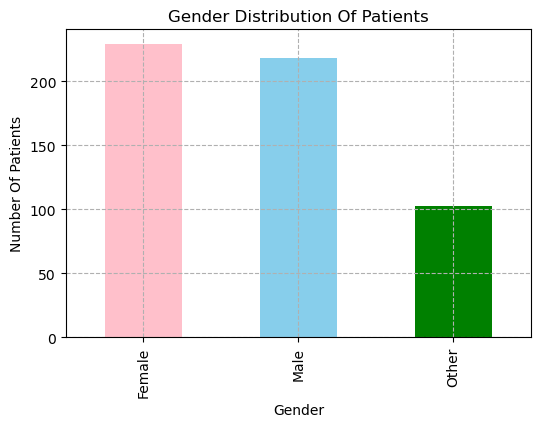

In [73]:
# Building a bar plot 
plt.figure(figsize=(6,4))
gender_count.plot(kind='bar',color=['Pink','skyblue','Green'])
plt.title('Gender Distribution Of Patients')
plt.xlabel('Gender')
plt.ylabel('Number Of Patients')
plt.grid(linestyle='--')
plt.show()

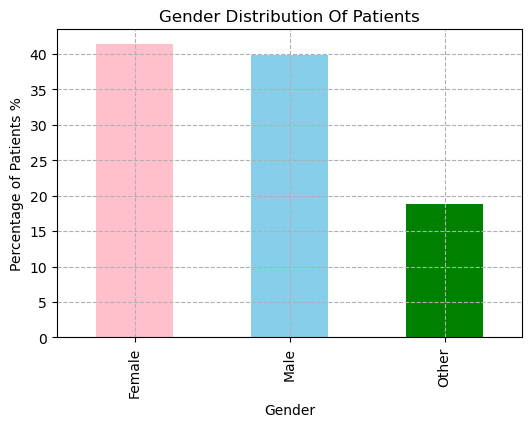

In [104]:
gender_percentage=health_data['Gender'].value_counts(normalize=True)*100
# Building a bar plot 
plt.figure(figsize=(6,4))
gender_percentage.plot(kind='bar',color=['Pink','skyblue','Green'])
plt.title('Gender Distribution Of Patients')
plt.xlabel('Gender')
plt.ylabel('Percentage of Patients %')
plt.grid(linestyle='--')
plt.savefig('Gender_Distribution.png')
plt.show()

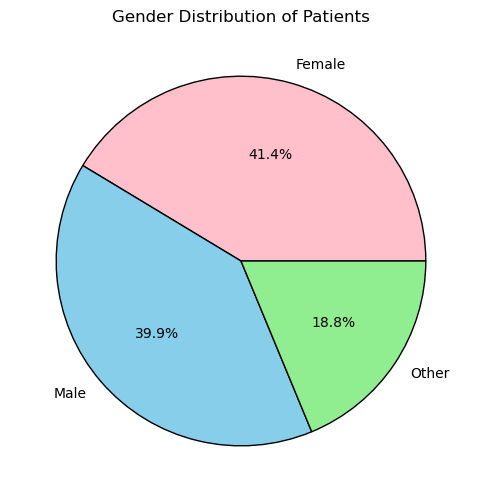

In [105]:
# Creating a pie chart ! 
gender_count=health_data['Gender'].value_counts() 
plt.figure(figsize=(8,6))
plt.pie(
    gender_count,
    autopct='%1.1f%%',
    labels=gender_count.index,
    colors=['Pink','Skyblue','LightGreen'],
    wedgeprops={'edgecolor':'black'}
)
plt.title('Gender Distribution of Patients')
plt.savefig('Gender Distribution_Piechart.png')
plt.show()

#### What are the top 5 cities with the highest number of patients?

In [100]:
# What are the top 5 cities with the highest number of patients?
top_five_cities=health_data['City'].value_counts().sort_values(ascending=False).head(5)
top_five_cities

City
Lake David          3
Smithshire          2
East Christopher    2
Christopherville    2
Brownburgh          2
Name: count, dtype: int64

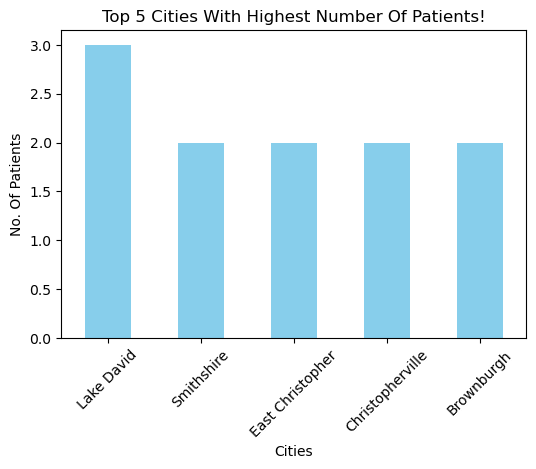

In [106]:
# Now plotting this data with a histogram
plt.figure(figsize=(6,4))
top_five_cities.plot(kind='bar',color='skyblue')
plt.title('Top 5 Cities With Highest Number Of Patients!')
plt.xlabel('Cities')
plt.ylabel('No. Of Patients')
plt.xticks(rotation=45)
plt.savefig('Top 5 Cities With Highest Number of Patients.png')
plt.show()

#### How many patients were admitted to each department?

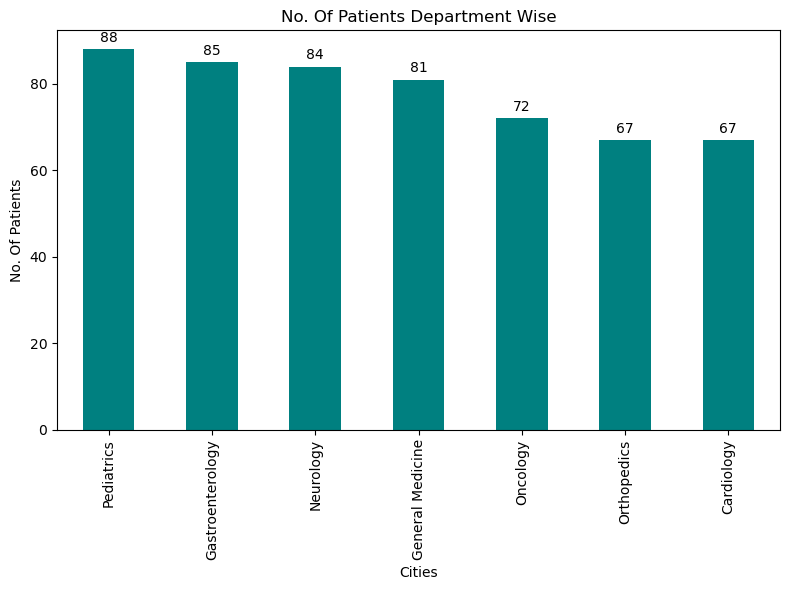

In [108]:
count_patients_department_wise=health_data['Department'].value_counts()
plt.figure(figsize=(8,6))
count_patients_department_wise.plot(kind='bar',color='teal')
plt.title('No. Of Patients Department Wise')
plt.xlabel('Cities')
plt.ylabel('No. Of Patients')
# Add value labels
for i, value in enumerate(count_patients_department_wise.values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)
plt.savefig('No. Of Patients Department Wise.png')
plt.tight_layout()
plt.show()

In [101]:
count_patients_department_wise

Department
Pediatrics          88
Gastroenterology    85
Neurology           84
General Medicine    81
Oncology            72
Orthopedics         67
Cardiology          67
Name: count, dtype: int64

#### What is the average length of stay per department?

In [56]:
health_data.groupby('Department')['Length_of_Stay'].mean().round().astype(int)

Department
Cardiology          15
Gastroenterology    17
General Medicine    16
Neurology           15
Oncology            15
Orthopedics         16
Pediatrics          14
Name: Length_of_Stay, dtype: int64

#### What is the overall average treatment cost?

In [60]:
print(health_data['Treatment_Cost'].mean())

10358.991513342697


#### What is the overall average treatment cost across Department?

In [62]:
# Across department
health_data.groupby('Department')['Treatment_Cost'].mean().sort_values(ascending=False)

Department
Oncology            11041.993281
Gastroenterology    10877.192941
Neurology           10465.361146
Pediatrics          10194.060819
Orthopedics         10067.503346
General Medicine     9996.070622
Cardiology           9781.109465
Name: Treatment_Cost, dtype: float64

#### What are the top 3 most common diagnosis?


In [65]:
top_three_diagnosis=health_data['Diagnosis'].value_counts().sort_values(ascending=False).head(3)
top_three_diagnosis

Diagnosis
Fracture        77
Tuberculosis    69
Migraine        65
Name: count, dtype: int64

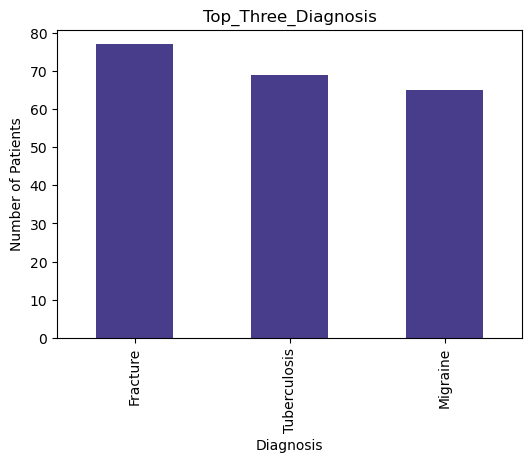

In [110]:
plt.figure(figsize=(6,4))
top_three_diagnosis.plot(kind='bar',color='darkslateblue')
plt.title('Top_Three_Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Patients')
plt.savefig('Top_Three_Diagnosis.png')
plt.show()

#### What is the readmission rate within 30 days?

In [69]:
readmission_rate=health_data['Readmission_Within_30_Days'].value_counts('normalize')*100
readmission_rate

Readmission_Within_30_Days
No     82.536765
Yes    17.463235
Name: proportion, dtype: float64

Text(41.972222222222214, 0.5, 'Percent(%) of Total Patients')

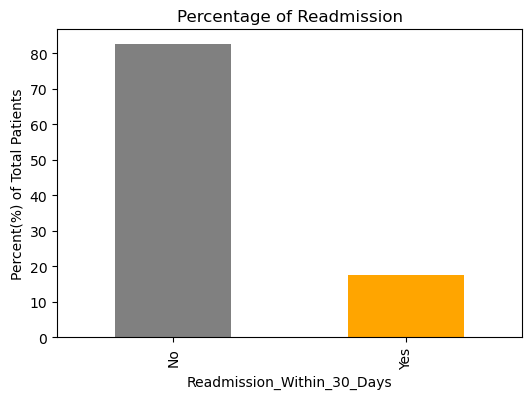

In [114]:
plt.figure(figsize=(6,4))
readmission_rate.plot(kind='bar',color=['grey','orange'])
plt.title('Percentage of Readmission')
plt.savefig('Percentage of Readmission.png')
plt.ylabel('Percent(%) of Total Patients')

In [ ]:
# Final Interpretation
# Around 17.45% readmitted within 30 days
# Around 82% were not readmitted !

#### Which department has the highest average treatment cost?


In [76]:
print('Highest Average Treatment Cost :',health_data.groupby('Department')['Treatment_Cost'].mean().sort_values(ascending=False).head(1).index[0])

Highest Average Treatment Cost : Oncology


#### Is there any correlation between patient's age and treatment cost?


In [77]:
# Is there any correlation between patient's age and treatment cost?
health_data['Age'].corr(health_data['Treatment_Cost'])
# Correlation is negative

np.float64(-0.04149068369516543)

####  What is the distribution of payment methods among patients?


In [78]:
distribution_payment=health_data['Payment_Method'].value_counts()
distribution_payment

Payment_Method
Insurance      161
Medicare       141
Credit Card    124
Cash           118
Name: count, dtype: int64

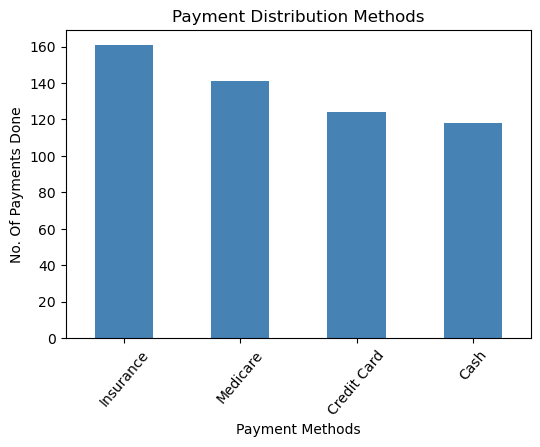

In [116]:
plt.figure(figsize=(6,4))
distribution_payment.plot(kind='bar',color='steelblue')
plt.title('Payment Distribution Methods')
plt.xlabel('Payment Methods')
plt.ylabel('No. Of Payments Done')
plt.xticks(rotation=50)
plt.savefig('Payment Distribution Methods.png')

plt.show()
# We can see most of the payents has been done through Insurance 

####  Which city has the highest average treatment cost?

In [81]:
health_data.groupby('City')['Treatment_Cost'].mean().sort_values(ascending=False).head(1).index[0]

'Kevinberg'

####  How does average length of stay differ by diagnosis?

In [193]:
health_data.groupby('Diagnosis')['Length_of_Stay'].mean().round().astype(int)

Diagnosis
Arthritis       18
Asthma          15
COVID-19        13
Cancer          15
Diabetes        16
Fracture        18
Hypertension    15
Migraine        12
Tuberculosis    15
Name: Length_of_Stay, dtype: int64

#### Identify if older patients (say 60+) have higher readmission rates compared to younger ones.


In [208]:
readmission_rate_above_60=health_data[health_data['Age']>60]['Readmission_Within_30_Days'].value_counts(normalize=True)*100
print(f'Readmission Rate of patients >60 years Old : {readmission_rate_above_60.iloc[1]}')

Readmission Rate : 13.901345291479823


In [213]:
readmission_rate_below_60=health_data[health_data['Age']<60]['Readmission_Within_30_Days'].value_counts(normalize=True)*100
print(f'Readmission Rate of patients <60 years old : {readmission_rate_below_60.iloc[1]}')

Readmission Rate of patients <60 years old : 20.24922118380062


In [ ]:
# Hence, readmission rate of patients >60 is less than the readmission rate of younger patients !

#### Calculate the % of deceased patients for each department (mortality rate analysis).


In [82]:
# Calculating mortality rate analysis 
mortality_rate=health_data[health_data['Outcome']=='Deceased'].groupby('Department').size()/health_data.groupby('Department').size()*100
mortality_rate

Department
Cardiology          34.328358
Gastroenterology    25.882353
General Medicine    33.333333
Neurology           32.142857
Oncology            41.666667
Orthopedics         44.776119
Pediatrics          29.545455
dtype: float64

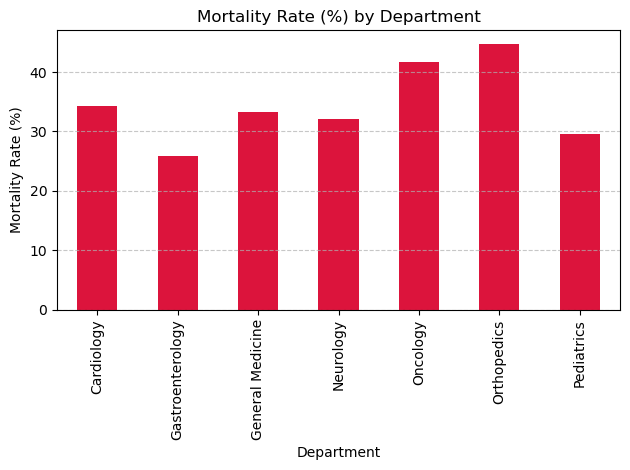

In [117]:
mortality_rate.plot(kind='bar', color='crimson')
plt.title('Mortality Rate (%) by Department')
plt.ylabel('Mortality Rate (%)')
plt.xlabel('Department')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Mortality Rate(%) by Department.png')
plt.show()

#### Find the top 10 patients with the highest treatment costs — What patterns do they share (age, department, diagnosis)?

In [84]:
top_10_patients=health_data['Treatment_Cost'].sort_values(ascending=False).head(10)
top_10_patients

484    19960.29
357    19950.65
24     19910.74
505    19871.53
436    19859.13
241    19855.42
85     19849.01
516    19808.10
7      19795.71
375    19778.99
Name: Treatment_Cost, dtype: float64

In [85]:
top_10_patients.index

Index([484, 357, 24, 505, 436, 241, 85, 516, 7, 375], dtype='int64')

In [86]:
health_data.iloc[484]

Patient_ID                                    491
Name                                Patricia Wolf
Gender                                       Male
Age                                             7
City                                 Lake Heather
Admission_Date                2024-07-31 00:00:00
Discharge_Date                2024-08-25 00:00:00
Department                            Orthopedics
Doctor_Name                      Jacqueline Ewing
Diagnosis                                Fracture
Treatment_Cost                            3575.12
Payment_Method                          Insurance
Readmission_Within_30_Days                    Yes
Length_of_Stay                               25.0
Outcome                                 Recovered
Name: 490, dtype: object

In [89]:

health_data['Age'].iloc[top_10_patients.index]

490     7
360    74
24     24
511    57
440    75
243    11
85     82
522     5
7      98
378    14
Name: Age, dtype: int64

In [90]:
ages=health_data['Age'].iloc[top_10_patients.index].values
bins=[0,12,18,60,100]
labels=['Child','Teen','Adult','Senior Citizens']
age_category=pd.cut(ages,bins=bins,labels=labels,right=True)
# Creating a new df 
df=pd.DataFrame({'Ages':ages,'Age_Category':age_category})
df

,Ages,Age_Category
0,7,Child
1,74,Senior Citizens
2,24,Adult
3,57,Adult
4,75,Senior Citizens
5,11,Child
6,82,Senior Citizens
7,5,Child
8,98,Senior Citizens
9,14,Teen


In [91]:
departments=health_data['Department'].iloc[top_10_patients.index].values
departments

array(['Orthopedics', 'Orthopedics', 'Orthopedics', 'Gastroenterology',
       'Gastroenterology', 'Neurology', 'Gastroenterology', 'Neurology',
       'Gastroenterology', 'Neurology'], dtype=object)

In [92]:
diagnosis=health_data['Diagnosis'].iloc[top_10_patients.index].values
diagnosis

array(['Fracture', 'COVID-19', 'Asthma', 'Tuberculosis', 'Hypertension',
       'Arthritis', 'Fracture', 'Tuberculosis', 'Diabetes', 'Diabetes'],
      dtype=object)

In [93]:
df=pd.DataFrame({'Ages':ages,'Age_Category':age_category,'Department':departments,'Diagnosis':diagnosis})
df

,Ages,Age_Category,Department,Diagnosis
0,7,Child,Orthopedics,Fracture
1,74,Senior Citizens,Orthopedics,COVID-19
2,24,Adult,Orthopedics,Asthma
3,57,Adult,Gastroenterology,Tuberculosis
4,75,Senior Citizens,Gastroenterology,Hypertension
5,11,Child,Neurology,Arthritis
6,82,Senior Citizens,Gastroenterology,Fracture
7,5,Child,Neurology,Tuberculosis
8,98,Senior Citizens,Gastroenterology,Diabetes
9,14,Teen,Neurology,Diabetes


Text(0.5, 1.0, 'Top 10 Patients Age Distribution')

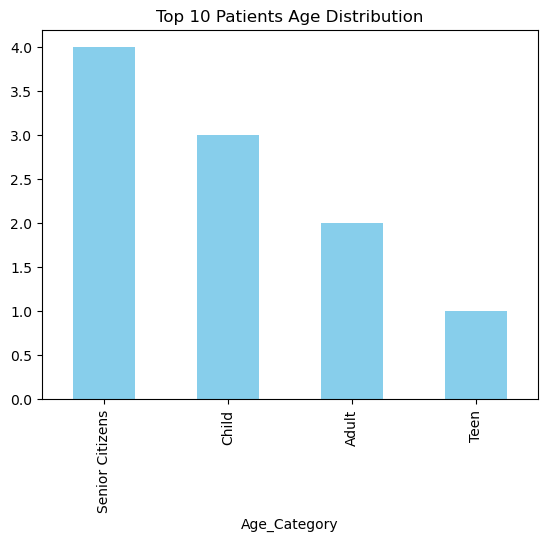

In [95]:
age_cat=df['Age_Category'].value_counts()
age_cat.plot(kind='bar',color='skyblue')
plt.title('Top 10 Patients Age Distribution')

In [ ]:
# So, most of them are adults belonging to 18 to 60 age bracket 

Text(0.5, 1.0, 'Top 10 Patients Distribution By Department')

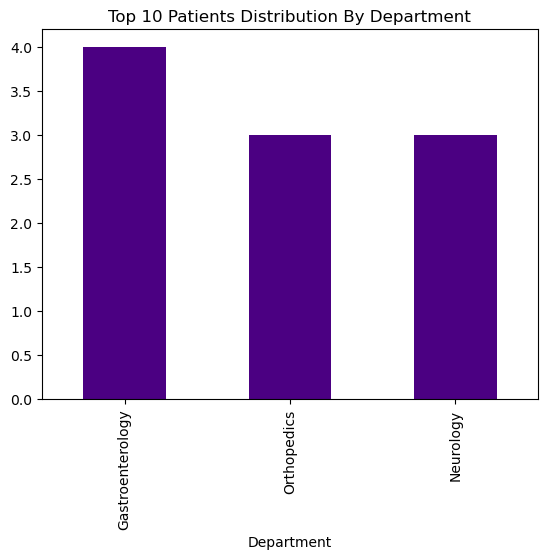

In [96]:
departments_cat=df['Department'].value_counts()
departments_cat.plot(kind='bar',color='indigo')
plt.title('Top 10 Patients Distribution By Department')

In [ ]:
# Most of them belong to Gastroenterology department 

Text(0.5, 1.0, 'Top 10 Patients Distribution By Diagnosis')

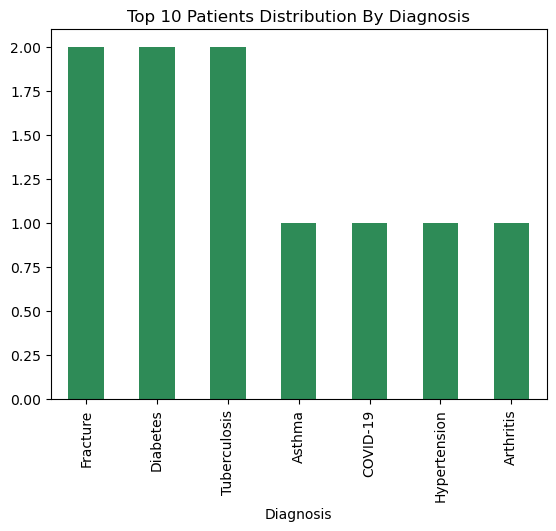

In [97]:
diagnosis_cat=df['Diagnosis'].value_counts()
diagnosis_cat.plot(kind='bar',color='seagreen')
plt.title('Top 10 Patients Distribution By Diagnosis')

In [ ]:
# Most of them have fracture 

#### For patients who got readmitted within 30 days, what was their most common original diagnosis?


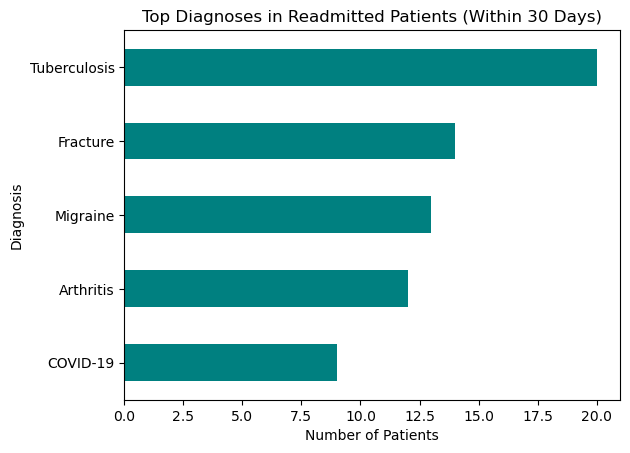

In [286]:
most_common_diagnosis=health_data[health_data['Readmission_Within_30_Days']=='Yes'].groupby('Diagnosis').size().sort_values(ascending=False).head(5)
most_common_diagnosis.plot(kind='barh', color='teal')
plt.title("Top Diagnoses in Readmitted Patients (Within 30 Days)")
plt.xlabel("Number of Patients")
plt.gca().invert_yaxis()
plt.show()

#### Create a cohort of patients who were "recovered" vs. "ongoing" vs. "deceased" — what is their average treatment cost and stay?


In [292]:
recovered_cohort=health_data[health_data['Outcome']=='Recovered']
ongoing_cohort=health_data[health_data['Outcome']=='Ongoing']
deceased_cohort=health_data[health_data['Outcome']=='Deceased']

In [298]:
recovered_cohort[['Treatment_Cost','Length_of_Stay']].mean().round()

Treatment_Cost    9870.0
Length_of_Stay      16.0
dtype: float64

In [300]:
ongoing_cohort[['Treatment_Cost','Length_of_Stay']].mean().round()

Treatment_Cost    10193.0
Length_of_Stay       14.0
dtype: float64

In [303]:
deceased_cohort[['Treatment_Cost','Length_of_Stay']].mean().round()

Treatment_Cost    11043.0
Length_of_Stay       15.0
dtype: float64

# Summary Report

### 🩺 Patient Demographics
* Average Age of Patients: 51.66 years

* Gender Distribution:

    - Female: 41.64%

    - Male: 39.64%

    - Other: 18.73%

* Top 5 Cities by Patient Count:

    * Lake David (3)
    
    * Smithshire (2)
    
    * East Christopher (2)
    
    * Christopherville (2)
    
    * Brownburgh (2)



#### 🏥 Hospital Departments & Admissions
* Admissions per Department:

    - Pediatrics: 88
    
    - Gastroenterology: 85
    
    - Neurology: 84
    
    - General Medicine: 81
    
    - Oncology: 72
    
    - Orthopedics: 67
    
    - Cardiology: 67
 
* Average Length of Stay by Department:

    * Gastroenterology: 17 days
    
    * General Medicine / Orthopedics: 16 days
    
    * Cardiology / Neurology / Oncology: 15 days
    
    * Pediatrics: 14 days

#### 💰 Treatment Cost Analysis

* Overall Average Treatment Cost: ₹10,358.99

* Average Treatment Cost by Department:

    * Oncology: ₹11,041.99 (Highest)
    
    * Gastroenterology: ₹10,877.19
    
    * Neurology: ₹10,465.36
    
    * Pediatrics: ₹10,194.06
    
    * Orthopedics: ₹10,067.50
    
    * General Medicine: ₹9,996.07

Cardiology: ₹9,781.11 (Lowest)

City with Highest Avg. Treatment Cost: Kevinberg

#### 🧾 Medical Insights
* Top 3 Diagnoses:

   - Fracture (77 cases)
    
   - Tuberculosis (69 cases)
    
   - Migraine (65 cases)

* Average Stay by Diagnosis:

   - Longest: Arthritis, Fracture (18 days)
    
   - Shortest: Migraine (12 days)

* Readmission Rate (within 30 days):

   - Yes: 17.46%
    
   - No: 82.54%

* Readmission by Age:

   - > 60 years: 13.90%
    
   - < 60 years: 20.25%

 Key findings -: Younger patients have a higher readmission rate.

#### 💳 Financial & Mortality Overview
* Payment Methods Used:

    - Insurance: 161
    
    - Medicare: 141
    
    - Credit Card: 124

    - Cash: 118

* Department-wise Mortality Rate:

    - Highest: Orthopedics (44.78%)

    - Oncology (41.67%)

    - Cardiology (34.33%)

    - General Medicine (33.33%)

    - Neurology (32.14%)

    - Pediatrics (29.55%)

    Lowest: Gastroenterology (25.88%)